# Project 2 (Group 7)

Members: <br>
Feng Leung 300366142 <br>
Karli Li 300350713<br>
Tom Tsang 300363109<br>
King Lok Wan 300360889<br>

# Part A. Classification Modelling Requirement

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns

## 2. Library import and data loading

In [2]:
df = pd.read_csv('bank-sampled-9K.csv')
df

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
2,11,29,admin.,single,secondary,no,390,yes,no,unknown,5,may,137,1,-1,0,unknown,no
3,12,53,technician,married,secondary,no,6,yes,no,unknown,5,may,517,1,-1,0,unknown,no
4,17,57,blue-collar,married,primary,no,52,yes,no,unknown,5,may,38,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
8996,45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
8997,45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
8998,45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes


## 3. Data Analysis, Preparation and Wrangling

In [3]:
#dtop column duration
df.drop('duration', axis=1, inplace=True)

#convert to last_contact
from datetime import datetime as dt
last_date = '18 Nov, 2010'
dt_1 = dt.strptime(last_date, '%d %b, %Y')
# the month needs to start with a capital Letter
df['month'] = df['month'].apply(lambda x: x.capitalize()) 
df['date'] = df['day'].astype(str) +" " + df['month'] + ', 2010'
# calculate the duration between the two dates
df['last_contact'] = df['date'].apply(lambda x: (dt_1 - dt.strptime(x, "%d %b, %Y")).days)
df.drop(columns={'day', 'date', 'month'}, axis=1, inplace=True)

In [4]:
#check missing values
df.isnull().sum()

Unnamed: 0      0
age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
campaign        0
pdays           0
previous        0
poutcome        0
y               0
last_contact    0
dtype: int64

In [5]:
#check duplicate rows
df.duplicated().sum()

0

In [6]:
#drop unnamed:0 column
df.drop(df.columns[0], axis=1, inplace=True)

In [7]:
df.describe()

,age,balance,campaign,pdays,previous,last_contact
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,41.035667,1372.970222,2.767667,39.906444,0.609556,150.289000
std,10.561698,3363.690197,3.011022,99.440498,3.499115,74.721977
min,18.000000,-4057.000000,1.000000,-1.000000,0.000000,-42.000000
25%,33.000000,68.000000,1.000000,-1.000000,0.000000,104.000000
50%,39.000000,450.000000,2.000000,-1.000000,0.000000,166.000000
75%,48.000000,1453.250000,3.000000,-1.000000,0.000000,193.000000
max,90.000000,102127.000000,51.000000,831.000000,275.000000,316.000000


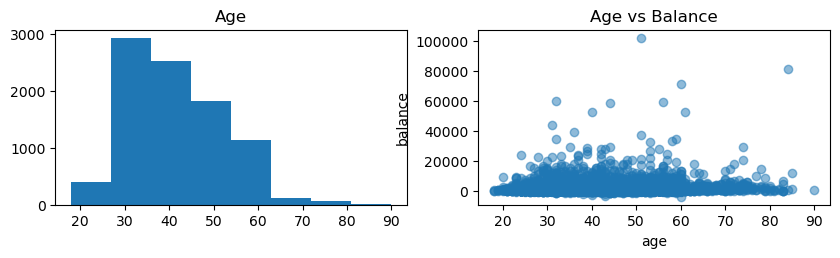

In [8]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

ax1.hist(df['age'], bins=8)
ax1.set_title("Age")

ax2.scatter(df['age'], df['balance'], alpha = 0.5)
ax2.set_title("Age vs Balance")
ax2.set_xlabel("age")
ax2.set_ylabel("balance")

plt.show()

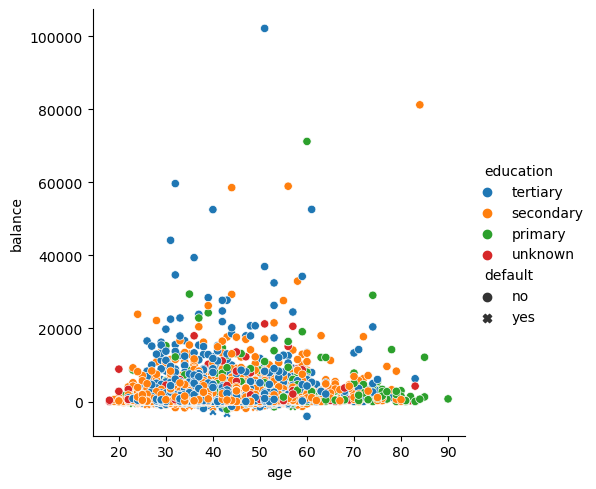

<Figure size 2000x1000 with 0 Axes>

In [9]:
sns.relplot(
    data=df,
    x="age", y="balance",
    hue="education", style="default"
)
plt.figure(figsize=(20,10))
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           9000 non-null   int64 
 1   job           9000 non-null   object
 2   marital       9000 non-null   object
 3   education     9000 non-null   object
 4   default       9000 non-null   object
 5   balance       9000 non-null   int64 
 6   housing       9000 non-null   object
 7   loan          9000 non-null   object
 8   contact       9000 non-null   object
 9   campaign      9000 non-null   int64 
 10  pdays         9000 non-null   int64 
 11  previous      9000 non-null   int64 
 12  poutcome      9000 non-null   object
 13  y             9000 non-null   object
 14  last_contact  9000 non-null   int64 
dtypes: int64(6), object(9)
memory usage: 1.0+ MB


In [11]:
# Separate categorical and numerical columns
df_cat = df.select_dtypes('object')
df_num = df.select_dtypes(include=['float64', 'int64'])

# One-hot encode categorical columns
df_cat_encoded = pd.get_dummies(df_cat, prefix=df_cat.columns, drop_first=True)

# Combine categorical and numerical columns
df = pd.concat([df_num, df_cat_encoded], axis=1)

In [12]:
#rename the columns with valid values
df = df.rename(columns=lambda x: x.replace('-', '_'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  9000 non-null   int64
 1   balance              9000 non-null   int64
 2   campaign             9000 non-null   int64
 3   pdays                9000 non-null   int64
 4   previous             9000 non-null   int64
 5   last_contact         9000 non-null   int64
 6   job_blue_collar      9000 non-null   uint8
 7   job_entrepreneur     9000 non-null   uint8
 8   job_housemaid        9000 non-null   uint8
 9   job_management       9000 non-null   uint8
 10  job_retired          9000 non-null   uint8
 11  job_self_employed    9000 non-null   uint8
 12  job_services         9000 non-null   uint8
 13  job_student          9000 non-null   uint8
 14  job_technician       9000 non-null   uint8
 15  job_unemployed       9000 non-null   uint8
 16  job_unknown          900

In [13]:
df.describe()

,age,balance,campaign,pdays,previous,last_contact,job_blue_collar,job_entrepreneur,job_housemaid,job_management,...,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y_yes
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,...,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,41.035667,1372.970222,2.767667,39.906444,0.609556,150.289000,0.211444,0.034000,0.029222,0.211000,...,0.042889,0.016667,0.560222,0.158556,0.063222,0.287556,0.039222,0.032444,0.817556,0.114556
std,10.561698,3363.690197,3.011022,99.440498,3.499115,74.721977,0.408356,0.181239,0.168438,0.408041,...,0.202618,0.128026,0.496388,0.365281,0.243376,0.452648,0.194134,0.177187,0.386232,0.318503
min,18.000000,-4057.000000,1.000000,-1.000000,0.000000,-42.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,68.000000,1.000000,-1.000000,0.000000,104.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,39.000000,450.000000,2.000000,-1.000000,0.000000,166.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,48.000000,1453.250000,3.000000,-1.000000,0.000000,193.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,90.000000,102127.000000,51.000000,831.000000,275.000000,316.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4. Feature Selection

In [14]:
#Define target variables and features matrix
X = df.drop(columns = 'y_yes')
y = df['y_yes']

### Method 1: Use SelectFromModel and LogisticRegression

In [15]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 5000)
select = SelectFromModel(lr) # Select features with importance scores above the median
X_1 = select.fit_transform(X, y) # Fit to X and y, transform X to selected features

# Get the selected features index
X_1_index = select.get_support(indices=True)
X_1_features = X.columns[X_1_index].tolist()

print(X_1_index)
print(X_1_features)
print(X_1.shape)

[ 8 10 23 24 26 28 29]
['job_housemaid', 'job_retired', 'housing_yes', 'loan_yes', 'contact_unknown', 'poutcome_success', 'poutcome_unknown']
(9000, 7)


### Method 2: Linear SVM (please use regularization hyperparameter value 0.001)

In [16]:
from sklearn.svm import LinearSVC
# Create a Linear SVM with L1 regularization
lsvc = LinearSVC(C=0.001)

# Use SelectFromModel to perform feature selection
selector = SelectFromModel(lsvc)
X_2 = selector.fit_transform(X, y)

# Get the selected features index
X_2_index = selector.get_support(indices=True)
X_2_features = X.columns[X_2_index].tolist()

print(X_2_index)
print(X_2_features)
print(X_2.shape)

[10 17 19 23 24 26 28 29]
['job_retired', 'marital_married', 'education_secondary', 'housing_yes', 'loan_yes', 'contact_unknown', 'poutcome_success', 'poutcome_unknown']
(9000, 8)


C:\Users\KM_Notebook\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Method 3: SelectKBest with mutual_info_classif as the score metric

In [17]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Use SelectKBest to select the top 10 features based on mutual information
selector_kbest = SelectKBest(mutual_info_classif, k=10)
selector_kbest.fit(X, y)
X_3 = selector_kbest.fit_transform(X, y)

# Get the selected features index
X_3_index = selector_kbest.get_support(indices=True)
X_3_features = X.columns[X_3_index].tolist()

print(X_3_index)
print(X_3_features)
print(X_3.shape)

[ 0  1  3  4  5 13 23 26 28 29]
['age', 'balance', 'pdays', 'previous', 'last_contact', 'job_student', 'housing_yes', 'contact_unknown', 'poutcome_success', 'poutcome_unknown']
(9000, 10)


From the three method above, method 1 (Use SelectFromModel and LogisticRegression) give the least number of features.

Save the features into csv file

In [18]:
# Get the column names of the selected features
selected_columns = df.columns[X_1_index]
df_selected = df[selected_columns]
# save the feature dataframe into a csv file
#  I only save the features so it is without the target variable
df_selected.to_csv('feature1.csv', index=False)

### Use robust scaler to scale the feature selected

In [19]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

# Initialize a RobustScaler object
scaler = RobustScaler()
scaler.fit(X_1)
scaled_data = scaler.transform(X_1)

# Replace the original columns with the scaled data
X_1 = scaled_data
X_1 = pd.DataFrame(X_1, columns=selected_columns)
X_1.head()

,job_housemaid,job_retired,housing_yes,loan_yes,contact_unknown,poutcome_success,poutcome_unknown
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## 5. Classifier Modelling

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

In [21]:
#split to training set and testing set
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, y, test_size=0.25, random_state=42)

In [22]:
classifiers = [
    ('Naive Bayes', GaussianNB()),
    ('KNN', KNeighborsClassifier(n_neighbors=3)),
    ('Decision Tree', DecisionTreeClassifier(max_depth=5)),
    ('Random Forest', RandomForestClassifier(max_depth=5,n_estimators=100)),
    ('Ada BOOST', AdaBoostClassifier()),
    ('XGBOOST', XGBClassifier())
]

# Define the pipeline for each classifier
pipelines = []
for name, clf in classifiers:
    pipelines.append((name, Pipeline([('clf', clf)])))

In [23]:
# Evaluate classifier using cross-validation
results = []
for name, pipe in pipelines:
    kfold = KFold(n_splits=3, shuffle=True, random_state=42)
    cv_results = cross_val_score(pipe, X_train1, y_train1, cv=kfold, scoring='accuracy')
    results.append((name, cv_results.mean()))

C:\Users\KM_Notebook\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\KM_Notebook\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

In [24]:
# Print the results and the best classifier
for name, score in results:
    print(f"{name}: {score:.3f}")
best_classifier = max(results, key=lambda x: x[1])[0]
print(f"\nBest Classifier: {best_classifier}")

Naive Bayes: 0.872
KNN: 0.890
Decision Tree: 0.895
Random Forest: 0.895
Ada BOOST: 0.896
XGBOOST: 0.895

Best Classifier: Ada BOOST


## 6. Classifier Model – The Second Try 

In [25]:
# do feature selection with random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Create a Random Forest classifier object
rf = RandomForestClassifier(n_estimators=10, random_state=42)

# Use SelectFromModel to perform feature selection
selector_rf = SelectFromModel(rf)
X_4 = selector_rf.fit_transform(X, y)

# Get the selected features index
X_4_index = selector_rf.get_support(indices=True)

print(X_4_index)

selected_feature_names = list(X.columns[X_4_index])
print(selected_feature_names)
print(X_4.shape)

[ 0  1  2  3  5 28]
['age', 'balance', 'campaign', 'pdays', 'last_contact', 'poutcome_success']
(9000, 6)


In [26]:
# Get the column names of the selected features
selected_columns = df.columns[X_4_index]
df_selected = df[selected_columns]
# save the feature dataframe into a csv file
# here I only save the features so it is without the target variable
df_selected.to_csv('feature2.csv', index=False)

In [27]:
# Do robust scaling
# Initialize a RobustScaler object
scaler = RobustScaler()
scaler.fit(X_4)
scaled_data_4 = scaler.transform(X_4)

# Replace the original columns with the scaled data
X_4 = scaled_data_4
X_4 = pd.DataFrame(X_4, columns=X.columns[X_4_index])
X_4.head()

,age,balance,campaign,pdays,last_contact,poutcome_success
0,1.266667,1.222162,-0.5,0.0,0.348315,0.0
1,-0.400000,-0.323407,-0.5,0.0,0.348315,0.0
2,-0.666667,-0.043313,-0.5,0.0,0.348315,0.0
3,0.933333,-0.320520,-0.5,0.0,0.348315,0.0
4,1.200000,-0.287313,-0.5,0.0,0.348315,0.0


### Repeat step 5

In [28]:
#split to training set and testing set
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_4, y, test_size=0.25, random_state=42)

In [29]:
# Evaluate classifier using cross-validation
results = []
for name, pipe in pipelines:
    kfold = KFold(n_splits=3, shuffle=True, random_state=42)
    cv_results = cross_val_score(pipe, X_train4, y_train4, cv=kfold, scoring='accuracy')
    results.append((name, cv_results.mean()))

C:\Users\KM_Notebook\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\KM_Notebook\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

In [30]:
# Print the results and the best classifier
for name, score in results:
    print(f"{name}: {score:.3f}")
best_classifier = max(results, key=lambda x: x[1])[0]
print(f"\nBest Classifier: {best_classifier}")

Naive Bayes: 0.890
KNN: 0.869
Decision Tree: 0.892
Random Forest: 0.895
Ada BOOST: 0.893
XGBOOST: 0.889

Best Classifier: Random Forest


## 7. Model Evaluation

In step 5, the best model is Ada BOOST with accuracy 0.896 <br>
In step 6, the best model is random forest with accuracy 0.895 <br>
The accuracy of Ada BOOST obtained in step 5 is slightly better than Random Forest Model obtained in step 6 by 0.001. 
<br><br>
For the features used:
- in step 5, the model has used 7 features
- in step 6, only 6 features were used.


In [31]:
#build the model with full training set
rnf = RandomForestClassifier(max_depth=5,n_estimators=100)
rnf.fit(X_train4, y_train4)
y_pred = rnf.predict(X_test4)

In [32]:
#create confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test4, y_pred)
print(confusion_matrix)

[[1974   32]
 [ 202   42]]


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

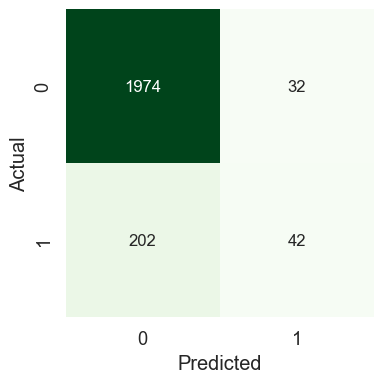

In [33]:
df_cm = pd.DataFrame(confusion_matrix, columns=np.unique(y_test4), index = np.unique(y_test4))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.set(font_scale=1.2)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cbar=False,
           square=True, fmt="d", cmap="Greens")

In [34]:
#create classification report
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test4, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2006
           1       0.57      0.17      0.26       244

    accuracy                           0.90      2250
   macro avg       0.74      0.58      0.60      2250
weighted avg       0.87      0.90      0.87      2250



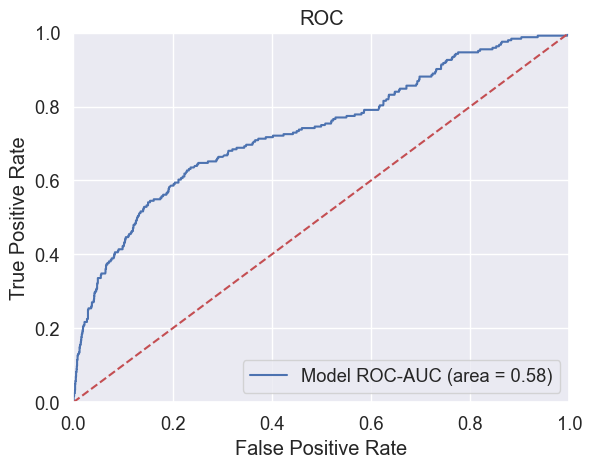

In [35]:
#create a roc curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 

rnf_roc_auc = roc_auc_score(y_test4, y_pred)
fpr, tpr, thresholds = roc_curve(y_test4, rnf.predict_proba(X_test4)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Model ROC-AUC (area = %0.2f)' % rnf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

The imbalanced class distribution may be the possible cause for the classifier to predict the rejection (class 0) more accurately than predicting the acceptance (class 1). As the number of samples in one class is much larger than in the other, the classifier may become biased towards the majority class.
<br>
One method would be using the random forest model - probability function. Instead of the default 0.5, we use 0.1 here so that it would more likely to predict an acceptance.

In [36]:
rnf = RandomForestClassifier(max_depth=5, n_estimators=100)
rnf.fit(X_train4, y_train4)

y_pred_proba = rnf.predict_proba(X_test4)
y_pred_moreneg = (y_pred_proba[:, 1] >= 0.1).astype(int)

#create confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test4, y_pred_moreneg)
print(confusion_matrix)

[[1363  643]
 [  81  163]]


In [37]:
# Generate the classification report
report = classification_report(y_test4, y_pred_moreneg)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.68      0.79      2006
           1       0.20      0.67      0.31       244

    accuracy                           0.68      2250
   macro avg       0.57      0.67      0.55      2250
weighted avg       0.86      0.68      0.74      2250



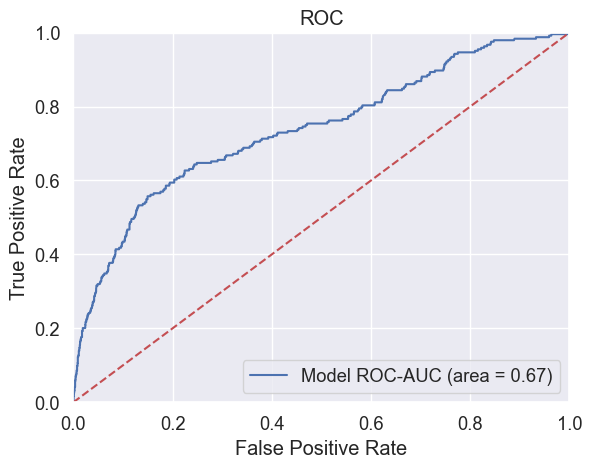

In [38]:
#create a roc curve
rnf_roc_auc_2 = roc_auc_score(y_test4, y_pred_moreneg)
fpr, tpr, thresholds = roc_curve(y_test4, rnf.predict_proba(X_test4)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Model ROC-AUC (area = %0.2f)' % rnf_roc_auc_2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

We can see that by changing the thereshold probability to 0.1, out of the 244 accepted instance, we can predict 163 of it. and the roc-auc score has increased from 0.58 to 0.67

## 8. Prediction

In [39]:
#first load the test df
df_test = pd.read_csv('test.csv')

In [40]:
df_test

,age,balance,job,marital,housing,contact,campaign,pdays,last_contact,poutcome
0,45,8000,blue-collar,married,yes,cellular,12,300,45,success
1,65,700,retired,divorced,yes,telephone,2,1,1,success
2,80,100,unknown,unknown,no,telephone,1,1,200,unknown
3,21,300,students,single,no,cellular,3,90,180,success


In [41]:
df_x = pd.read_csv('feature2.csv')

In [42]:
#have a look on the categorical columns
df_test_cat=df_test[df_test.select_dtypes('object').columns]
df_new_cat= pd.DataFrame()

#create dummies
for label in df_test.select_dtypes('object').columns:
    col_cat = pd.get_dummies(df_test_cat[label], prefix=label)
    df_new_cat = pd.concat([df_new_cat, col_cat], axis=1)   

In [43]:
#combine the categorical and numeric variable
df_test = df_test.drop(columns = df_test.select_dtypes('object').columns)
df_test = pd.concat([df_test, df_new_cat], axis=1)

In [44]:
common_cols = set(df_test.columns).intersection(set(df_x.columns))
df_test = df_test[list(common_cols)]

In [45]:
df_test

,pdays,age,poutcome_success,campaign,balance,last_contact
0,300,45,1,12,8000,45
1,1,65,1,2,700,1
2,1,80,0,1,100,200
3,90,21,1,3,300,180


In [46]:
df_test =df_test.reindex(columns=['age', 'balance', 'campaign', 'pdays', 'last_contact', 'poutcome_success'], copy=False)

In [47]:
X =df_test
X

,age,balance,campaign,pdays,last_contact,poutcome_success
0,45,8000,12,300,45,1
1,65,700,2,1,1,1
2,80,100,1,1,200,0
3,21,300,3,90,180,1


In [48]:
scaled_data_4 = scaler.transform(X)
# Replace the original columns with the scaled data
X = scaled_data_4
X = pd.DataFrame(X, columns=df_test.columns)
X.head()

C:\Users\KM_Notebook\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


,age,balance,campaign,pdays,last_contact,poutcome_success
0,0.400000,5.450280,5.0,301.0,-1.359551,1.0
1,1.733333,0.180473,0.0,2.0,-1.853933,1.0
2,2.733333,-0.252662,-0.5,2.0,0.382022,0.0
3,-1.200000,-0.108284,0.5,91.0,0.157303,1.0


In [49]:
y_pred_test = rnf.predict(X)
y_pred_prob = rnf.predict_proba(X)

In [50]:
print("Predictions:", y_pred_test)
print("Probabilities:\n", y_pred_prob)

Predictions: [0 1 0 1]
Probabilities:
 [[0.56492946 0.43507054]
 [0.40222881 0.59777119]
 [0.61213734 0.38786266]
 [0.39938336 0.60061664]]


From the result above, we can predict that the second and fourth customer subscribed a term deposit.

In [51]:
print(rnf.feature_importances_)

[0.18194912 0.09263573 0.03562572 0.13511503 0.13800763 0.41666676]


Based on the prediction results and the feature importance, the following can be concluded:<br>
If the outcome of the previous marketing campaign is success, more likely the client subscribed a term deposit. <br>
Therefore to increase the likelihood a client to subscribe a term deposit. Management should launch attractive promotion.

# Part B

In [52]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns

In [53]:
df = pd.read_csv('bank-sampled-9K.csv')
df

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
2,11,29,admin.,single,secondary,no,390,yes,no,unknown,5,may,137,1,-1,0,unknown,no
3,12,53,technician,married,secondary,no,6,yes,no,unknown,5,may,517,1,-1,0,unknown,no
4,17,57,blue-collar,married,primary,no,52,yes,no,unknown,5,may,38,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
8996,45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
8997,45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
8998,45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes


In [54]:
#drop first column
df.drop(df.columns[0], axis=1, inplace=True)
df.drop('duration', axis=1, inplace=True)

#convert to last_contact
from datetime import datetime as dt
last_date = '18 Nov, 2010'
dt_1 = dt.strptime(last_date, '%d %b, %Y')
# the month needs to start with a capital Letter
df['month'] = df['month'].apply(lambda x: x.capitalize()) 
df['date'] = df['day'].astype(str) +" " + df['month'] + ', 2010'
# calculate the duration between the two dates
df['last_contact'] = df['date'].apply(lambda x: (dt_1 - dt.strptime(x, "%d %b, %Y")).days)
df.drop(columns={'day', 'date', 'month'}, axis=1, inplace=True)

In [55]:
# Separate categorical and numerical columns
df_cat = df.select_dtypes('object')
df_num = df.select_dtypes(include=['float64', 'int64'])
num_cols = df_num.columns

# One-hot encode categorical columns
df_cat_encoded = pd.get_dummies(df_cat, prefix=df_cat.columns, drop_first=True)

# Combine categorical and numerical columns
df = pd.concat([df_num, df_cat_encoded], axis=1)
df = df.rename(columns=lambda x: x.replace('-', '_'))

In [56]:
df.describe()

,age,balance,campaign,pdays,previous,last_contact,job_blue_collar,job_entrepreneur,job_housemaid,job_management,...,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y_yes
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,...,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,41.035667,1372.970222,2.767667,39.906444,0.609556,150.289000,0.211444,0.034000,0.029222,0.211000,...,0.042889,0.016667,0.560222,0.158556,0.063222,0.287556,0.039222,0.032444,0.817556,0.114556
std,10.561698,3363.690197,3.011022,99.440498,3.499115,74.721977,0.408356,0.181239,0.168438,0.408041,...,0.202618,0.128026,0.496388,0.365281,0.243376,0.452648,0.194134,0.177187,0.386232,0.318503
min,18.000000,-4057.000000,1.000000,-1.000000,0.000000,-42.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,68.000000,1.000000,-1.000000,0.000000,104.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,39.000000,450.000000,2.000000,-1.000000,0.000000,166.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,48.000000,1453.250000,3.000000,-1.000000,0.000000,193.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,90.000000,102127.000000,51.000000,831.000000,275.000000,316.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
# Select only numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64'])

# Compute the skewness of each numerical column
skewness = num_cols.apply(lambda x: x.skew())

# Print the skewness of each numerical column
print(skewness)

age              0.649005
balance         10.686480
campaign         4.424767
pdays            2.623204
previous        55.018106
last_contact    -0.281312
dtype: float64


It could be observed that the data is highly rightward skewed.

## 4. Feature Selection

In [58]:
#Define target variables and features matrix
X = df.drop(columns = 'y_yes')
y = df['y_yes']

### Method 1: Use SelectFromModel and LogisticRegression

In [59]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 5000)
select = SelectFromModel(lr) # Select features with importance scores above the median
X_1 = select.fit_transform(X, y) # Fit to X and y, transform X to selected features

# Get the selected features index
X_1_index = select.get_support(indices=True)

# Get the selected feature names
X_1_cols = X.columns[X_1_index]

# Create a DataFrame with the selected features
X_1 = pd.DataFrame(X_1, columns=X_1_cols)

print(X_1_cols)

Index(['job_housemaid', 'job_retired', 'housing_yes', 'loan_yes',
       'contact_unknown', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')


### Method 2: Linear SVM (please use regularization hyperparameter value 0.001)

In [60]:
from sklearn.svm import LinearSVC
# Create a Linear SVM with L1 regularization
lsvc = LinearSVC(C=0.001)

# Use SelectFromModel to perform feature selection
selector = SelectFromModel(lsvc)
X_2 = selector.fit_transform(X, y)

# Get the selected features index
X_2_index = selector.get_support(indices=True)

# Get the selected feature names
X_2_cols = X.columns[X_2_index]

# Create a DataFrame with the selected features
X_2 = pd.DataFrame(X_2, columns=X_2_cols)

print(X_2_cols)

Index(['job_retired', 'marital_married', 'education_secondary', 'housing_yes',
       'loan_yes', 'contact_unknown', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')


C:\Users\KM_Notebook\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Method 3: SelectKBest with mutual_info_classif as the score metric

In [61]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Use SelectKBest to select the top 10 features based on mutual information
selector_kbest = SelectKBest(mutual_info_classif, k=10)
selector_kbest.fit(X, y)
X_3 = selector_kbest.fit_transform(X, y)


# Get the selected features index
X_3_index = selector_kbest.get_support(indices=True)

# Get the selected feature names
X_3_cols = X.columns[X_3_index]

# Create a DataFrame with the selected features
X_3 = pd.DataFrame(X_3, columns=X_3_cols)

print(X_3_cols)

Index(['age', 'balance', 'campaign', 'pdays', 'previous', 'last_contact',
       'job_technician', 'contact_unknown', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')


### Method 4: Use RF

In [62]:
# do feature selection with random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Create a Random Forest classifier object
rf = RandomForestClassifier(n_estimators=10, random_state=42)

# Use SelectFromModel to perform feature selection
selector_rf = SelectFromModel(rf)
X_4 = selector_rf.fit_transform(X, y)

# Get the selected features index
X_4_index = selector_rf.get_support(indices=True)

# Get the selected feature names
X_4_cols = X.columns[X_4_index]

# Create a DataFrame with the selected features
X_4 = pd.DataFrame(X_4, columns=X_4_cols)

print(X_4_cols)


Index(['age', 'balance', 'campaign', 'pdays', 'last_contact',
       'poutcome_success'],
      dtype='object')


## Selection method 5: no filter at all 

In [63]:
X_5= X

## See which combination of feature selection and model works the best 

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler, RobustScaler

In [65]:
import warnings
warnings.filterwarnings("ignore")

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import numpy as np

def fit_and_evaluate_2(X, y):

    # Define the classifiers with default parameters
    classifiers = [
        ('Decision Tree', DecisionTreeClassifier(random_state=42)),
        ('Random Forest', RandomForestClassifier(random_state=42)),
        ('AdaBoost', AdaBoostClassifier(random_state=42)),
        ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
        ('XGBoost', XGBClassifier(random_state=42, eval_metric='mlogloss'))
    ]

    # Define the hyperparameter grids for each classifier
    param_grids = {
        'Decision Tree': {'max_depth': [2, 5, 10]},
        'Random Forest': {'max_depth': [2, 5, 10], 'n_estimators': [50, 100, 200]},
        'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]},
        'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0], 'max_depth': [2, 5, 10]},
        'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0], 'max_depth': [2, 5, 10]}
    }

    # Define the evaluation metric (accuracy)
    scorer = make_scorer(accuracy_score)

    # Perform cross-validation and grid search for each classifier
    for name, clf in classifiers:
        print(f"Classifier: {name}")
        param_grid = param_grids[name]
        grid_search = GridSearchCV(clf, param_grid, cv=5, scoring=scorer)
        grid_search.fit(X, y)
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Best accuracy: {grid_search.best_score_:.4f}")

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import numpy as np

def fit_and_evaluate_3(X, y):

    # Define the classifiers with default parameters
    classifiers = [
        ('Extra Trees', ExtraTreesClassifier(random_state=42)),
        ('LightGBM', LGBMClassifier(random_state=42))
    ]

    # Define the hyperparameter grids for each classifier
    param_grids = {
        'Extra Trees': {'max_depth': [2, 5, 10], 'n_estimators': [50, 100, 200]},
        'LightGBM': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0], 'max_depth': [2, 5, 10]}
    }

    # Define the evaluation metric (accuracy)
    scorer = make_scorer(accuracy_score)

    # Perform cross-validation and grid search for each classifier
    for name, clf in classifiers:
        print(f"Classifier: {name}")
        param_grid = param_grids[name]
        grid_search = GridSearchCV(clf, param_grid, cv=5, scoring=scorer)
        grid_search.fit(X, y)
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Best accuracy: {grid_search.best_score_:.4f}")

### Evaluate

1. First we would like to see which feature selection method works the best

In [68]:
#Do with robust scaler

X_list = [X_1, X_2, X_3,X_4, X_5]

# loop over each X dataframe and fit/evaluate the model
for i, X in enumerate(X_list):
    print(f"X {i+1}")  
    # Select only the numeric columns to scale
    df_num = X.select_dtypes(include=['float64', 'int64'])

    # Create a RobustScaler object
    scaler = RobustScaler()

    # Fit and transform the data using the scaler
    df_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

    # Get the non-numeric columns
    df_nonnum = X.select_dtypes(exclude=['float64', 'int64'])

    # Concatenate the scaled numeric columns with the non-numeric columns
    X = pd.concat([df_nonnum, df_scaled], axis=1)

    fit_and_evaluate_2(X, y)
    print("")

X 1
Classifier: Decision Tree
Best parameters: {'max_depth': 5}
Best accuracy: 0.8940
Classifier: Random Forest
Best parameters: {'max_depth': 5, 'n_estimators': 50}
Best accuracy: 0.8907
Classifier: AdaBoost
Best parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Best accuracy: 0.8939
Classifier: Gradient Boosting
Best parameters: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 200}
Best accuracy: 0.8936
Classifier: XGBoost
Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}
Best accuracy: 0.8944

X 2
Classifier: Decision Tree
Best parameters: {'max_depth': 2}
Best accuracy: 0.8942
Classifier: Random Forest
Best parameters: {'max_depth': 5, 'n_estimators': 100}
Best accuracy: 0.8917
Classifier: AdaBoost
Best parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Best accuracy: 0.8940
Classifier: Gradient Boosting
Best parameters: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 200}
Best accuracy: 0.8934
Classifier: XGBoost
Best parameter

From the above results: <br>
(1) In general, different feature selction methods did not vary a lot in terms of accuracy. However It seems that feature scaling method that produce X_1 and X_2 give the best results. <br>
(2) In terms of models, XGBoost on X_1 and X_2 give the best results.

2. We then run some other model (eg. Extra trees and lightGBM) on both X_1 and X_2

In [69]:
X_list = [X_1, X_2]

# loop over each X dataframe and fit/evaluate the model
for i, X in enumerate(X_list):
    print(f"X {i+1}")  
    # Select only the numeric columns to scale
    df_num = X.select_dtypes(include=['float64', 'int64'])

    # Create a RobustScaler object
    scaler = RobustScaler()

    # Fit and transform the data using the scaler
    df_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

    # Get the non-numeric columns
    df_nonnum = X.select_dtypes(exclude=['float64', 'int64'])

    # Concatenate the scaled numeric columns with the non-numeric columns
    X = pd.concat([df_nonnum, df_scaled], axis=1)

    fit_and_evaluate_3(X, y)
    print("")

X 1
Classifier: Extra Trees
Best parameters: {'max_depth': 5, 'n_estimators': 50}
Best accuracy: 0.8910
Classifier: LightGBM
Best parameters: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200}
Best accuracy: 0.8939

X 2
Classifier: Extra Trees
Best parameters: {'max_depth': 5, 'n_estimators': 100}
Best accuracy: 0.8910
Classifier: LightGBM
Best parameters: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200}
Best accuracy: 0.8938



Result suggest that performing XGBoost on X_2 give the best accuracy.

## Perform gridsearch for the best parameter

In [70]:
#prepare the X for gridsearch
X = X_2

# Select only the numeric columns to scale
df_num = X.select_dtypes(include=['float64', 'int64'])

# Create a RobustScaler object
scaler = RobustScaler()

# Fit and transform the data using the scaler
df_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

# Get the non-numeric columns
df_nonnum = X.select_dtypes(exclude=['float64', 'int64'])

# Concatenate the scaled numeric columns with the non-numeric columns
X = pd.concat([df_nonnum, df_scaled], axis=1)


### For XGBoost

In [71]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, KFold

# Define the parameter grid for the XGBoost classifier
param_grid = {
    'n_estimators': [125,150,175],
    'max_depth': [4,5,6],
    'min_child_weight': [2,3],
    'learning_rate': [0.05, 0.01, 0.005]
}

# Create the XGBoost classifier
xgb = XGBClassifier(random_state=42, eval_metric='mlogloss')

# Create the grid search object
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=KFold(n_splits=10, shuffle=True, random_state=42))

# Fit the grid search object to the data
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 125}
Best score: 0.8957777777777778


We performed multiple runs of grid search to find the result is 0.8958.
<br> The best parameters are: learning_rate': 0.01, max_depth: 4, min_child_weight: 3, n_estimators: 125

# Member Contribution

|Student ID|Name| Tom Tsang | Feng Leung | King Lok Wan | Karli Li |
|--------------|------------|--------------|--------------|--------------||
|300363109|  Tom Tsang   |-----|  4  |  4  |  4  |
|300366142|  Feng Leung  |  4  |-----|  4  |  4  |
|300360889| King Lok Wan |  4  |  4  |-----|  4  |
|300350713|   Karli Li   |  4  |  4  |  4  |-----|